## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

2025-03-13 20:11:02.343379: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 20:11:02.344405: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-13 20:11:02.349606: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-13 20:11:02.363687: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741907462.387375  197400 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741907462.39

## Loading Data

In [2]:
np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)

### DF Sample

In [3]:
df = pd.DataFrame(data, columns=["temperature"])
df.head()

,temperature
0,26.764052
1,27.406646
2,29.910104
3,32.937234
4,34.097184


### Plotting DF

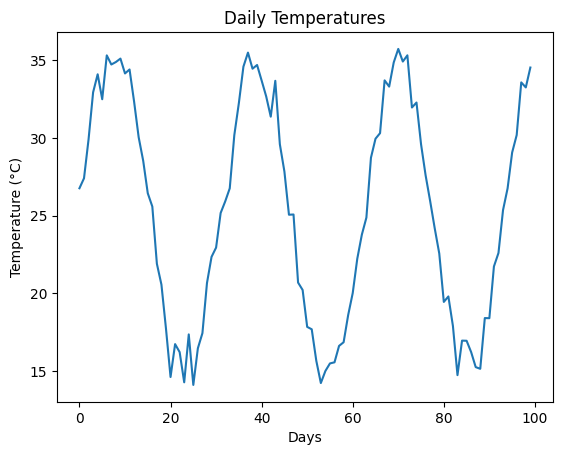

In [4]:
plt.plot(df)
plt.title("Daily Temperatures")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.show()

## Data Preprocessing
Arranging the data with a convertion where **40C -> 1** and **10C -> 0**

In [5]:
step_size = 30

windows_slides = np.array([
    df["temperature"][i : i+step_size].to_numpy() - 10
    for i in range(data.size - step_size)
])

windows_slides /= 30

windows_predictions = np.array([
    float(df["temperature"][i]) - 10
    for i in range(step_size, data.size, 1)
])

windows_predictions /= 30

In [6]:
train_slides, test_slides, train_temps, test_temps = \
    train_test_split(windows_slides, windows_predictions, test_size=0.2, random_state=777)

## Defining a model

In [7]:
model = Sequential([
    LSTM(30, input_shape=(30,1)),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam', loss='huber', metrics=['mse','mae','mape'])
model.summary()

2025-03-13 20:11:07.617694: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-03-13 20:11:07.617762: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-03-13 20:11:07.617777: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: stnz-LOQ
2025-03-13 20:11:07.617788: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: stnz-LOQ
2025-03-13 20:11:07.618149: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 565.57.1
2025-03-13 20:11:07.618195: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 565.57.1
2025-

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30)             │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,871 (15.12 KB)

 Trainable params: 3,871 (15.12 KB)

 Non-trainable params: 0 (0.00 B)

## Choosing a training

In [8]:
history = model.fit(train_slides, train_temps, epochs=20, batch_size=2)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0230 - mae: 0.1838 - mape: 54.6609 - mse: 0.0461
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0242 - mae: 0.1932 - mape: 62.4438 - mse: 0.0484
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mae: 0.1630 - mape: 44.7922 - mse: 0.0366
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0072 - mae: 0.0975 - mape: 28.9415 - mse: 0.0144
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0015 - mae: 0.0462 - mape: 11.8098 - mse: 0.0030
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.9896e-04 - mae: 0.0272 - mape: 6.4209 - mse: 0.0014    
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.3286e-04 - mae: 0.0327 - mape: 6.9320 - mse: 0.0015    
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.6688e-04 - mae: 0.0314 - mape: 8.3668 - mse: 0.0013    
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.5059e-04 - mae: 0.0315 - mape: 8.3848 

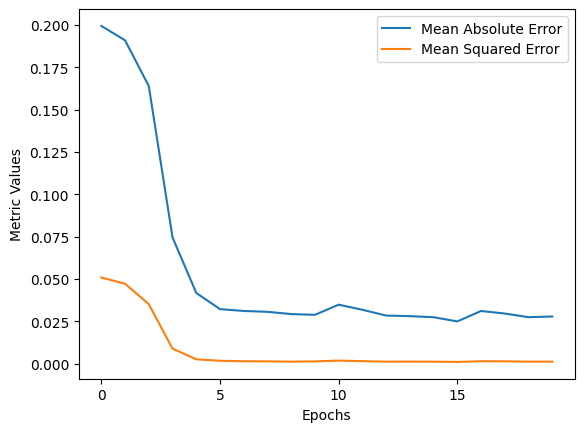

In [9]:
plt.plot(history.history['mae'], label="Mean Absolute Error")
plt.plot(history.history['mse'], label="Mean Squared Error")
plt.legend()
plt.xticks(range(0, 20, 5))
plt.xlabel("Epochs")
plt.ylabel("Metric Values")
plt.show()

### This means that is enough 5 epochs with a batch_size of 2.

## Final Model

In [10]:
model = Sequential([
    LSTM(30, input_shape=(30,1)),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam', loss='huber', metrics=['mse','mae','mape'])
model.fit(train_slides, train_temps, epochs=5, batch_size=2)

Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0247 - mae: 0.1998 - mape: 59.0120 - mse: 0.0494
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0235 - mae: 0.1941 - mape: 64.6470 - mse: 0.0471
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mae: 0.1652 - mape: 46.1036 - mse: 0.0355 
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0098 - mae: 0.1091 - mape: 24.2826 - mse: 0.0196
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013 - mae: 0.0423 - mape: 10.0241 - mse: 0.0025


In [11]:
predict_temps = model.predict(test_slides)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


## Showcasing Results

In [12]:
convert = lambda coded_temps : coded_temps*30 + 10
predict_temps = np.concatenate(predict_temps, axis = 0)

windows_df = pd.DataFrame( \
    {
        'real' : convert(test_temps).tolist(),
        'prediction' : convert(predict_temps).tolist()
    }
)

In [13]:
windows_df["abs_diff"] = abs(windows_df['real'] - windows_df['prediction'])

In [14]:
windows_df.head()

,real,prediction,abs_diff
0,29.951892,30.224493,0.272601
1,26.760716,28.448799,1.688083
2,25.076351,23.578091,1.498260
3,32.674441,34.405815,1.731374
4,25.360259,24.163975,1.196284


In [15]:
print(f"The biggest difference was {windows_df['abs_diff'].max():.4f}")
print(f"The smallest difference was {windows_df['abs_diff'].min():.4f}")
print(f"The mean diff was {windows_df['abs_diff'].mean():.4f}")

The biggest difference was 1.9680
The smallest difference was 0.1352
The mean diff was 0.9796


## Conclusion

The results show that the predictions do have a significant difference in degrees in some cases,<br>
but the predictions here are also good enough for daily general predictions.